In [33]:
import os
import pandas as pd
from PIL import Image
from pandas import DataFrame
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dropout, Dense
)

# Data directories and method for moving files

In [26]:
directory = "/home/becode/Projects/Machine_Learning/data/train/"
cat_dog_dir = "/home/becode/Projects/Machine_Learning/data/cat_dog/"
dog_dir = "/home/becode/Projects/Machine_Learning/data/cat_dog/dogs/"
cat_dir = "/home/becode/Projects/Machine_Learning/data/cat_dog/cats/"


files = os.listdir(directory)

def split_cats_and_dogs():
    for idx, file in enumerate(files):
        copyfile(directory+file,
            dog_dir+file if "dog" in file else cat_dir+file)

# Pandas dataframe

In [28]:
df = DataFrame(files, columns=["filename"])
df["dog"]= df["filename"].apply(lambda x: "dog" in x)

# Data generator prepares files for conv2D

In [29]:
def gen_train_images(batch_size = 256, target_size=(128,128)):
    data_generator = ImageDataGenerator(
        rescale=1.0/255.0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)
    return data_generator.flow_from_directory(
        cat_dog_dir,
        class_mode='categorical', 
        batch_size=batch_size, 
        target_size=target_size)

# Chosen model for speed, still reached 80%

In [ ]:
model = Sequential([
    Conv2D(6, 5, input_shape=(128,128,3), activation="relu"),
    MaxPooling2D(pool_size=5, strides=3),
    
    Conv2D(5, 3, activation="relu"),
    Conv2D(5, 3, activation="relu"),    
    MaxPooling2D(pool_size=5, strides=3),
    
    Flatten(),
    Dense(47, activation="relu"),
    Dense(47, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model.fit_generator(gen_train_images(16), epochs=50)

# Transform image size and plot

In [30]:
idx=0
dogs = dog_dir +df[df.dog].filename.apply(lambda x: x)
dogs = dogs.reset_index()
import numpy as np

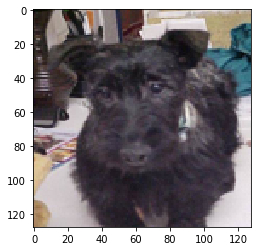

In [45]:
image = Image.open(dogs.iloc[idx].filename)
image = np.array(image.resize((128, 128)))
plt.imshow(image)
idx +=1

# Load model and predict class
#### Image from dataframe

Cat


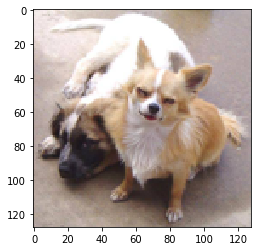

In [46]:
cat_dog = load_model("cat_dog_model.h5")
image = Image.open(dogs.iloc[idx].filename)
image = np.array(image.resize((128, 128)))
pred = cat_dog.predict(image.reshape(1,128,128,3))
print("Dog" if pred.argmax() else "Cat")
plt.imshow(image)
plt.show()

#### Image from data generator

Found 25000 images belonging to 2 classes.
Cat


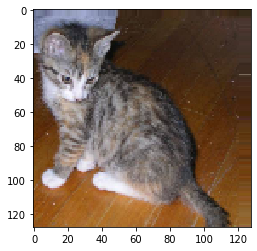

In [39]:
cat_dog = load_model("cat_dog_model.h5")
image = gen_train_images()[0][0][0]
pred = cat_dog.predict(image.reshape(1,128,128,3))
print("Dog" if pred.argmax() else "Cat")
plt.imshow(image)
plt.show()

# Other experimental models

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(128,128,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.25),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.25),
    
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    #Dropout(0.25),
    
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax")
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model.fit_generator(gen_train_images(512), epochs=1)

In [ ]:
model = Sequential([
    Conv2D(3, 5, input_shape=(128,128,3), activation="relu"),
    MaxPooling2D(pool_size=5, strides=3),
    Dropout(0.2),
    
    Conv2D(3, 5, activation="relu"),
    MaxPooling2D(pool_size=5, strides=3),
    Dropout(0.1),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model.fit_generator(gen_train_images(16), epochs=10)

In [ ]:
model = Sequential([
    Conv2D(6, 3, input_shape=(128,128,3), activation="relu"),
    MaxPooling2D(pool_size=5, strides=3),
    
    Conv2D(3, 5, activation="relu"),
    MaxPooling2D(pool_size=5, strides=3),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(52, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model.fit_generator(gen_train_images(16), epochs=10)

In [ ]:
model = Sequential([
    Conv2D(10, 5, input_shape=(128,128,3), activation="relu"),
    MaxPooling2D(pool_size=5, strides=3),
    
    Conv2D(8, 3, activation="relu"),
    Conv2D(5, 3, activation="relu"),
    MaxPooling2D(pool_size=4, strides=2),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model.fit_generator(gen_train_images(16), epochs=20)